## 学習データの準備

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# 説明変数
# 次元削減
X = df.iloc[0:100, [0, 2]].values

## ADALINEの実装

パーセプトロンとADALINEの違い

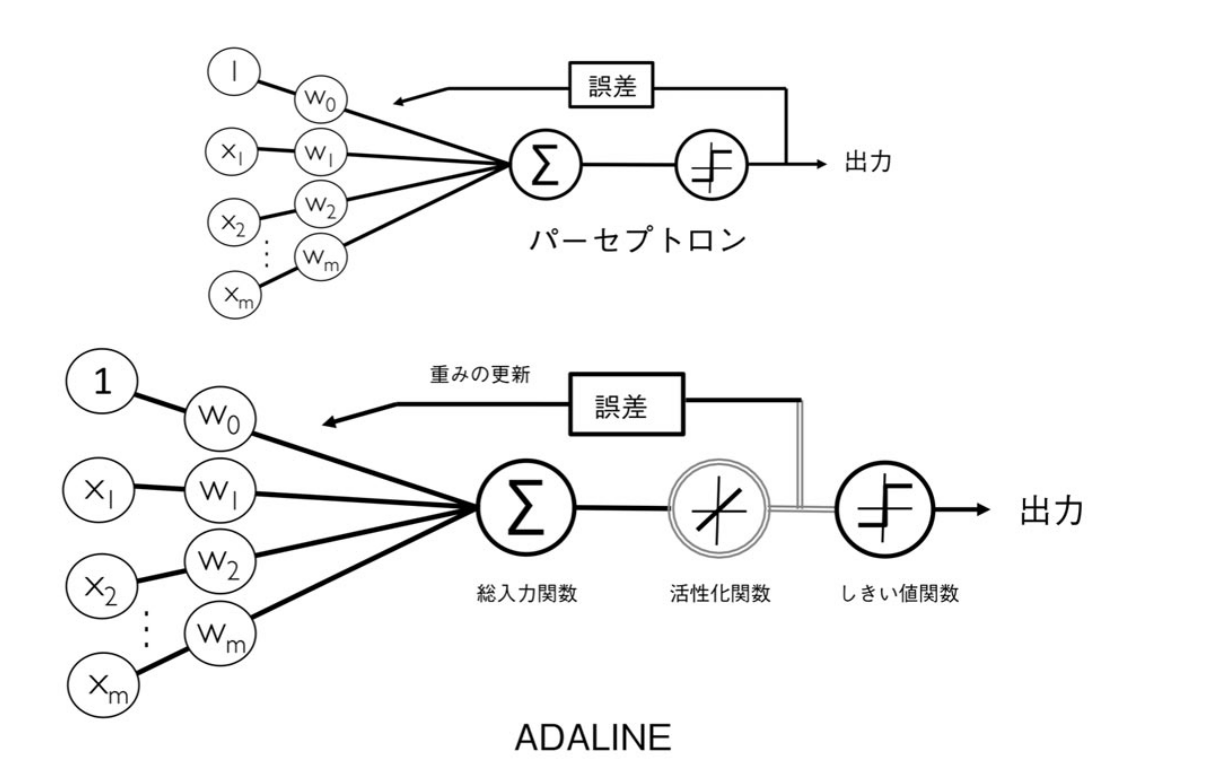

In [3]:
# 画像の表示
from IPython.display import Image
Image(filename='00.png', width=500)

### ADALINEをPythonで実装

In [4]:
class AdalineGD(object):
    """ADAptive LInear NEuron分類器
    
    パラメータ
    -------------
    eta : float
            学習率(0.0より大きく1.0以下の値)
    n_iter : int
            トレーニングデータのトレーニング回数
    random_state : int
            重みを初期化するための乱数シード
    
    属性
    -------------
    w_ : 一次元配列
            適合後の重み
    cost_ : リスト
            各エポックでの誤差平方和のコスト関数
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # eta
        self.n_iter = 50 # 繰り返す回数
        self.random_state = random_state # random_state
     
    def fit(self, X, y):
        """トレーニングデータに適合させる
        
        パラメータ
        -------------
        X : {配列のようなデータ構造}, shape=[n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数、n_featuresは特徴量の個数
        y : 配列のようなデータ構造, shape=[n_samples]
            目的変数
        
        戻り値
        ---------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) # 初期の重みを作成
        self.cost_ = []
        
        for i in range(self.n_iter): # トレーニング回数分トレーニングを反復
            net_input = self.net_input(X) 
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1: ]) + self.w_[0]
        
    def activation(self, X):
        return X
        
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) > 0.0, 1, -1)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

NameError: name 'ax' is not defined

## 標準化したデータで訓練

In [30]:
# データのコピー
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [32]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

SyntaxError: invalid syntax (<ipython-input-32-c98bbc4c385e>, line 28)

In [31]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

NameError: name 'plot_decision_regions' is not defined